# **Tomato Leaf Disease Detection**

#### **Implemented InceptionV3**

Dataset:- https://www.kaggle.com/datasets/noulam/tomato

In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 22 kB/s 
     |████████████████████████████████| 1.7 MB 10.4 MB/s 
     |████████████████████████████████| 439 kB 69.0 MB/s 
     |████████████████████████████████| 6.0 MB 67.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [2]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d noulam/tomato

100% 742M/743M [00:25<00:00, 40.3MB/s]
100% 743M/743M [00:25<00:00, 30.3MB/s]


In [4]:
#Data we have received is Zip format so, we have unzip the Dataset

import zipfile
import io
zf = zipfile.ZipFile("/content/tomato.zip", "r")
zf.extractall("/content")
zf.close()

In [5]:
# Importing all the required all the Libraries

import tensorflow
from tensorflow import keras 

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Flatten,Dense,Input,Lambda

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Import Inception
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

from glob import glob

In [6]:
# Re-Size the Image into same Size
Image_Size = [224,224] 

In [7]:
train_path = "/content/New Plant Diseases Dataset(Augmented)/train"
valid_path = "/content/New Plant Diseases Dataset(Augmented)/valid"

Note:- Include_top: This parameter says that "Remove the First and Last Layer , Because we know that my 1st Layer will have 224,224 from the weights itself. Sometimes people wants to put their own Input Image size. Apart from the Last Layer which will definately be Thousand Category but my proplem statement in this case has Four Categories."

In [8]:
inceptionv3 = InceptionV3(input_shape = Image_Size + [3],weights = "imagenet",include_top = False)

87910968/87910968 [==============================] - 3s 0us/step


trainable = False :- I dont want to use 1st and Last Layer 

In [9]:
# Important don't Trian the Existing weights

for layer in inceptionv3.layers:
  layer.trainable = False

In [10]:
#Useful for getting the number of output classes

folder = glob("/content/New Plant Diseases Dataset(Augmented)/train/*")

In [11]:
folder

['/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight']

In [12]:
len(folder)

10

In [13]:
#Flattening all the output of the Inception that i have downloaded above in cell no.16. Because, i'll be not having the Last LAyer 

x = Flatten()(inceptionv3.output)

(X) -> Concatenate the Flatten Layer of previous Inception

In [14]:
prediction = Dense(len(folder),activation = "softmax")(x)

In [15]:
#View the structure of the Model

#view the structure of the Model
model = Model(inputs = inceptionv3.input,outputs = prediction)

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [17]:
# tell the model what cost and optimization method to use
model.compile(
  loss='CategoricalCrossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

### **Data Preprocessing**

In [18]:
#data preprocessing

train_datagen = ImageDataGenerator(rescale= 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [19]:
#Preprocess the Test size

test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory("/content/New Plant Diseases Dataset(Augmented)/train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [21]:
#Reading Test DataSet
test_set = test_datagen.flow_from_directory("/content/New Plant Diseases Dataset(Augmented)/valid",
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = "categorical")

Found 4585 images belonging to 10 classes.


In [22]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-22-04ffb29a66a7>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
574/574 [==============================] - 248s 409ms/step - loss: 2.9883 - accuracy: 0.6803 - val_loss: 1.7164 - val_accuracy: 0.7839
Epoch 2/10
574/574 [==============================] - 226s 393ms/step - loss: 2.1063 - accuracy: 0.7925 - val_loss: 3.5947 - val_accuracy: 0.7306
Epoch 3/10
574/574 [==============================] - 230s 401ms/step - loss: 1.9429 - accuracy: 0.8238 - val_loss: 2.2827 - val_accuracy: 0.8113
Epoch 4/10
574/574 [==============================] - 227s 395ms/step - loss: 2.0139 - accuracy: 0.8399 - val_loss: 2.3070 - val_accuracy: 0.8231
Epoch 5/10
574/574 [==============================] - 228s 397ms/step - loss: 1.8510 - accuracy: 0.8549 - val_loss: 2.1537 - val_accuracy: 0.8371
Epoch 6/10
574/574 [==============================] - 227s 395ms/step - loss: 1.8747 - accuracy: 0.8667 - val_loss: 2.4966 - val_accuracy: 0.8382
Epoch 7/10
574/574 [==============================] - 226s 394ms/step - loss: 1.9741 - accuracy: 0.8669 - val_loss: 2.2770 -

In [23]:
print(r.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


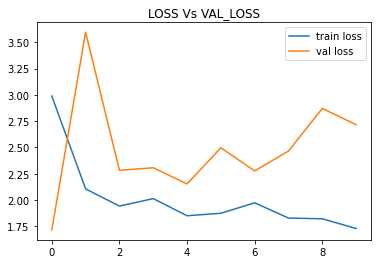

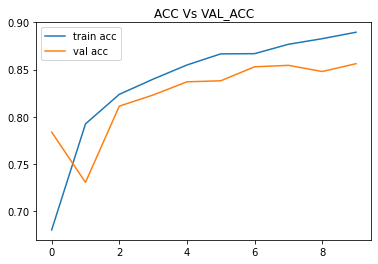

In [24]:
# plot the loss
import matplotlib.pyplot as plt

#plt.figure(figsize = (12,8))
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title("LOSS Vs VAL_LOSS")
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
#plt.figure(figsize = (12,8))
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title("ACC Vs VAL_ACC")
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

References:- 

1. https://keras.io/api/applications/
2. https://keras.io/api/applications/inceptionv3/
3. https://keras.io/api/applications/#usage-examples-for-image-classification-models